In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# train_data = np.unpackbits("../Project for ML/MoleculeEvaluationData/train.pkl.gz")
# test_data = np.unpackbits("../Project for ML/MoleculeEvaluationData/test.pkl.gz")
train_data = np.load("/media/chosen/3224DA3724D9FDB3/SharedFiles/course/ml/proj/Zhou/Project for ML/MoleculeEvaluationData/train.pkl", allow_pickle=1)
test_data = np.load("/media/chosen/3224DA3724D9FDB3/SharedFiles/course/ml/proj/Zhou/Project for ML/MoleculeEvaluationData/test.pkl", allow_pickle=1)

In [4]:
len(train_data["values"])

398581

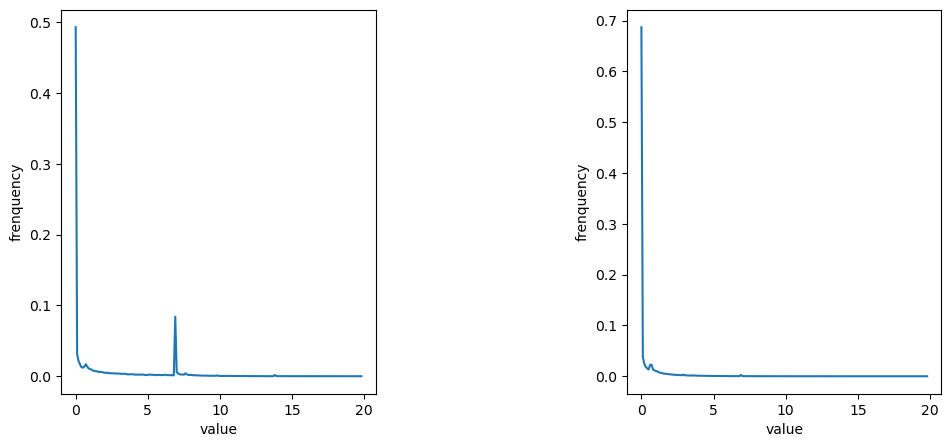

In [15]:
left  = 0.125  # the left side of the subplots of the figure
right = 1.5    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.8   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

bins = [i/10 for i in range(200)]
ax = plt.subplot(121)
ax.set_xlabel("value")
ax.set_ylabel("frenquency")
y1, x = np.histogram(test_data["values"], bins=bins)
x = x[:-1]
y1 = y1/sum(y1)
plt.plot(x,y1)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)

ax = plt.subplot(122)
ax.set_xlabel("value")
ax.set_ylabel("frenquency")
y2,x = np.histogram(train_data["values"], bins=bins)
x = x[:-1]
y2 = y2/sum(y2)
plt.plot(x,y2)


plt.savefig("difdist.png")


In [5]:
# define window size, output and axes
fig, ax = plt.subplots(figsize=[8,6])
# set plot title
ax.set_title("Some title")
# set x-axis name
ax.set_xlabel("X-Label")
# set y-axis name
ax.set_ylabel("Y-Label")
ax.hist(test_data["values"])
plt.show()

KeyboardInterrupt: 

In [81]:
print("train, min %0.2f, max %0.2f, mean %0.2f, std %0.2f\n test min %0.2f, max %0.2f, mean %0.2f, std %0.2f" %\
      (train_data["values"].min(), train_data["values"].max(), train_data["values"].mean(), train_data["values"].std(), \
        test_data["values"].min(), test_data["values"].max(), test_data["values"].mean(), test_data["values"].std()  ))

train, min 0.00, max 44.67, mean 0.46, std 1.27
 test min 0.00, max 45.20, mean 1.93, std 3.10


In [40]:
np.unpackbits(train_data["packed_fp"], axis=0).shape

(3188648, 256)

In [46]:
a = np.array([[1,0,0],[2,0,0]], dtype=np.uint8)
b = torch.Tensor(np.unpackbits(a, axis=1))
b.dtype

torch.float32

In [53]:
t = torch.Variable(10)

AttributeError: module 'torch' has no attribute 'Variable'

In [54]:
from argparse import ArgumentParser
import torch
from torch import nn
from torch.utils.data import DataLoader
from utils import Dataset2, MLP, mkdir_p
from dgllife.utils import EarlyStopping


In [55]:
DATASET_DIR = "../Project for ML/MoleculeEvaluationData/"
train_data = Dataset2(DATASET_DIR + "train.pkl")
train_loader = DataLoader(train_data, batch_size=64)
test_data = Dataset2(DATASET_DIR + "test.pkl", y_sigma=train_data.y_sigma, y_miu=train_data.y_miu)
test_loader = DataLoader(test_data, batch_size=64)

In [74]:
train_data.ground_truth.max()

tensor(44.6692)